In [3]:
#!unzip /content/drive/MyDrive/Task02_imagesTr_patches.zip

In [16]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [27]:
ROOT_DIR = "/content/Task02_imagesTr_patches"
imgs = []
images = np.zeros((1,3,224,224),dtype=np.float32)
for f in os.listdir(ROOT_DIR):
  img = cv2.imread(os.path.join(ROOT_DIR,f))
  img1 = cv2.resize(img,(224,224))
  img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
  img1 = img1/255.
  img1 = np.transpose(img1,(2,0,1))
  images[0] = img1
  im = torch.from_numpy(images).to(device) 
  imgs.append(im)

print(imgs[0].shape)

torch.Size([1, 3, 224, 224])


In [12]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3,16,padding='same',kernel_size=(3,3))

    def forward(self,x):
        x = self.conv1(x)
        return x


model = Net()
model.to(device)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
)

In [13]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
        #print(activation[name])
    return hook

In [14]:
model.conv1.register_forward_hook(get_activation('conv1'))

<built-in method type of Tensor object at 0x7fedd43177d0>
<built-in method type of Tensor object at 0x7fedd10662d0>
<built-in method type of Tensor object at 0x7fedd034c320>
<built-in method type of Tensor object at 0x7fedd109fcd0>
<built-in method type of Tensor object at 0x7fedd41a9550>
<built-in method type of Tensor object at 0x7fedbb173eb0>
<built-in method type of Tensor object at 0x7fedbaa84e10>
<built-in method type of Tensor object at 0x7fedba5db4b0>
<built-in method type of Tensor object at 0x7fedba174410>
<built-in method type of Tensor object at 0x7fed77a625a0>
<built-in method type of Tensor object at 0x7fed7754e3c0>
<built-in method type of Tensor object at 0x7fed77018410>
<built-in method type of Tensor object at 0x7fed76a62fa0>
<built-in method type of Tensor object at 0x7fed76571050>
<built-in method type of Tensor object at 0x7fed7606b820>
<built-in method type of Tensor object at 0x7fed75967f00>


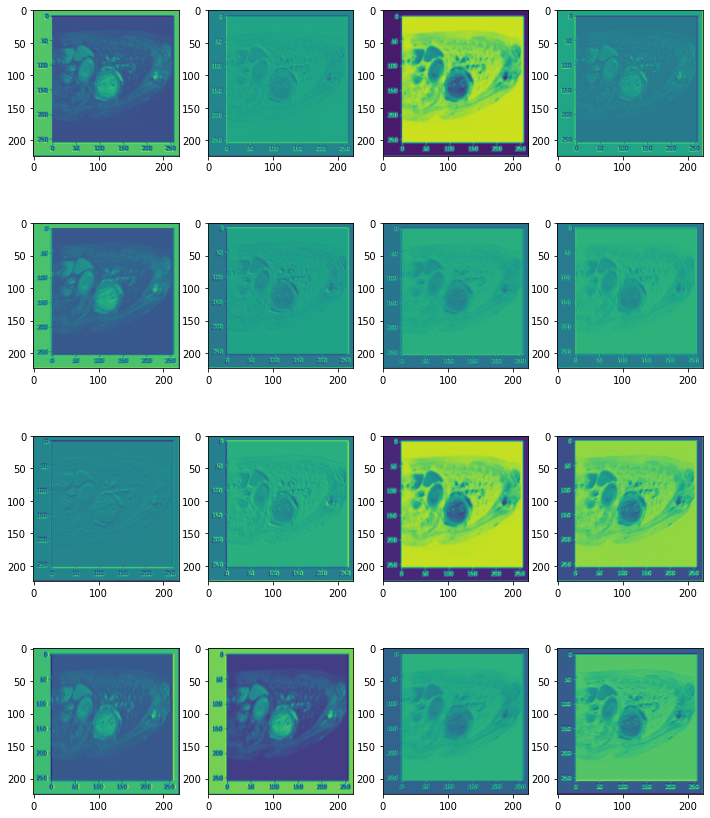

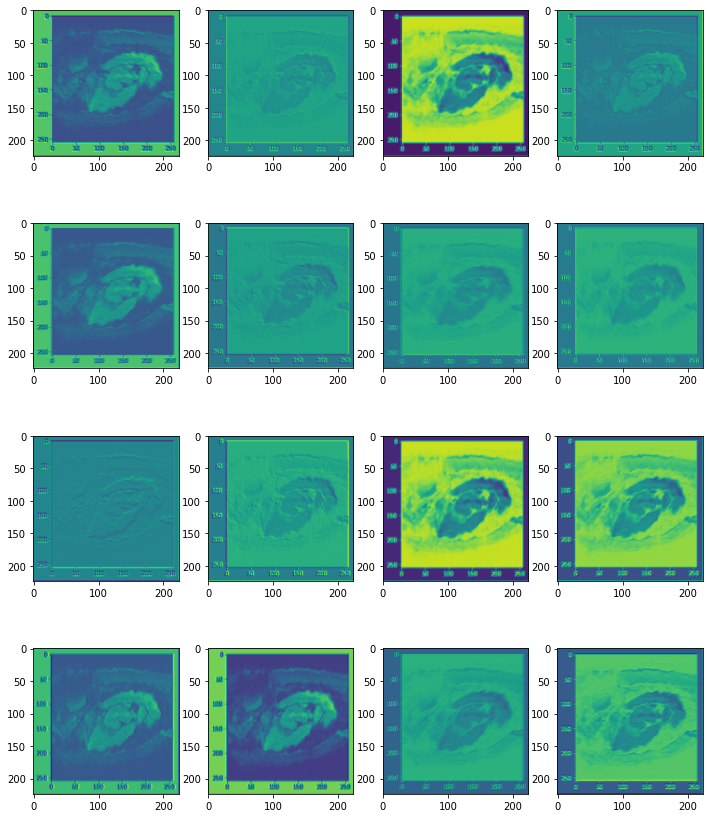

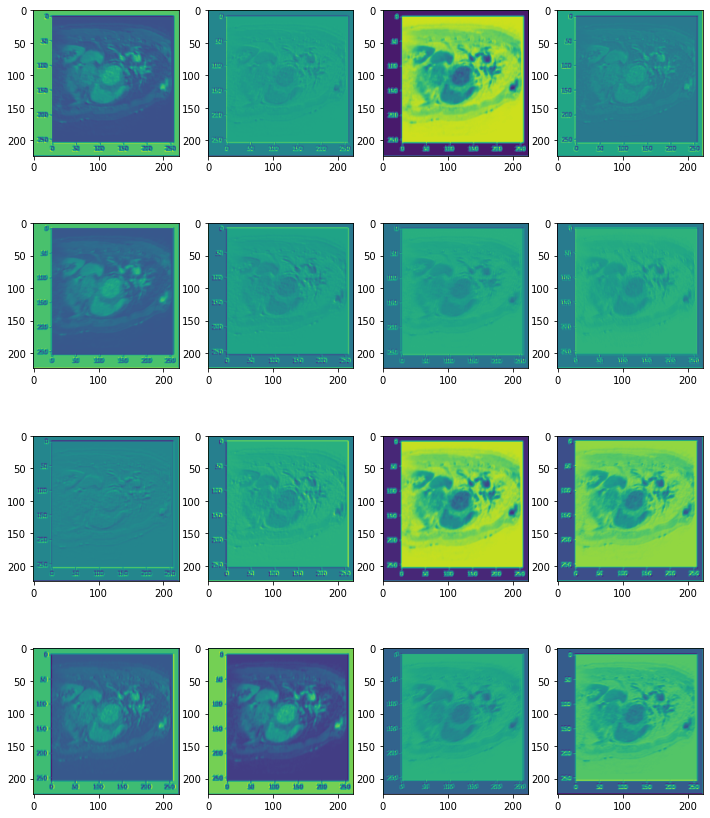

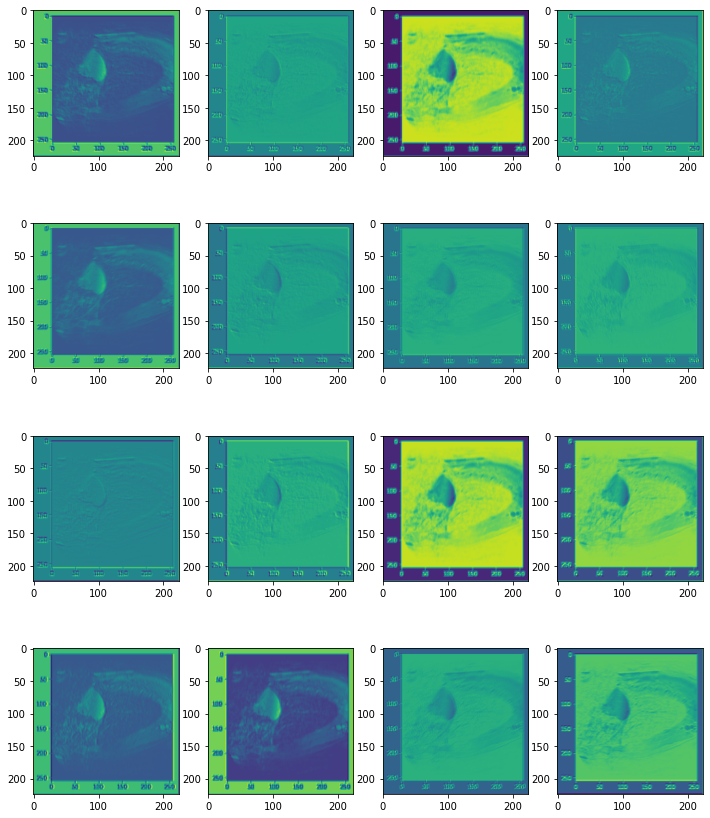

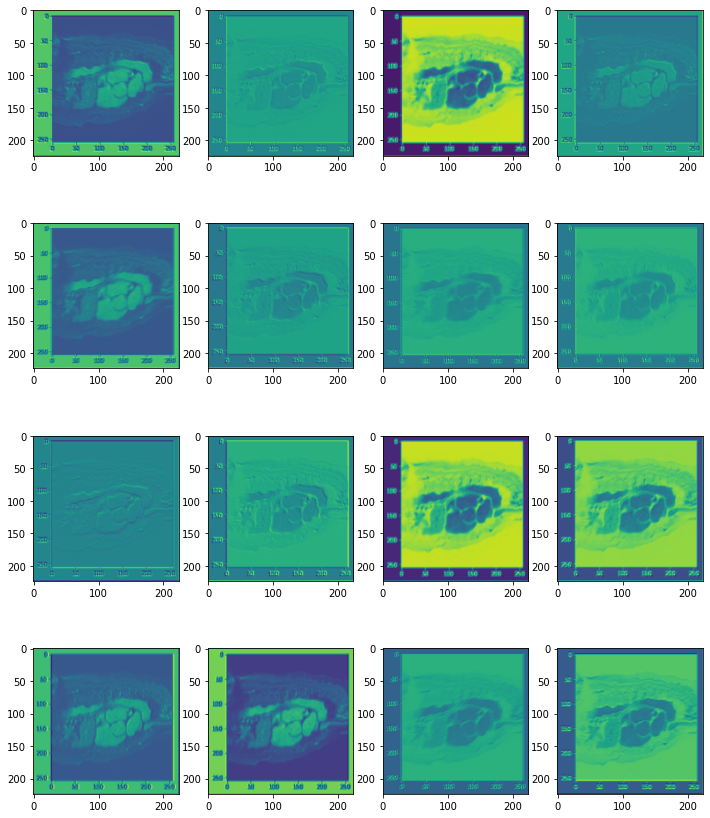

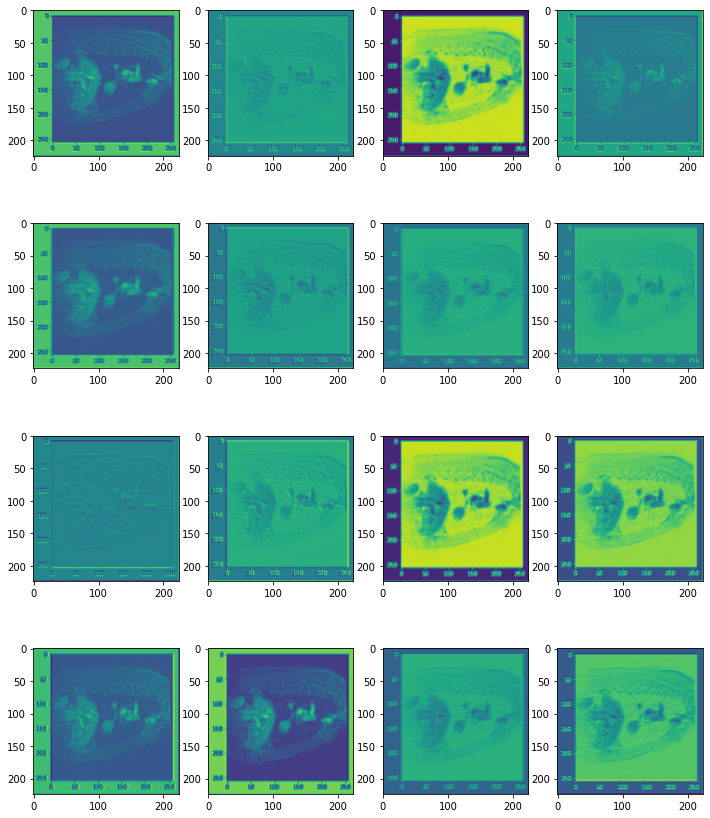

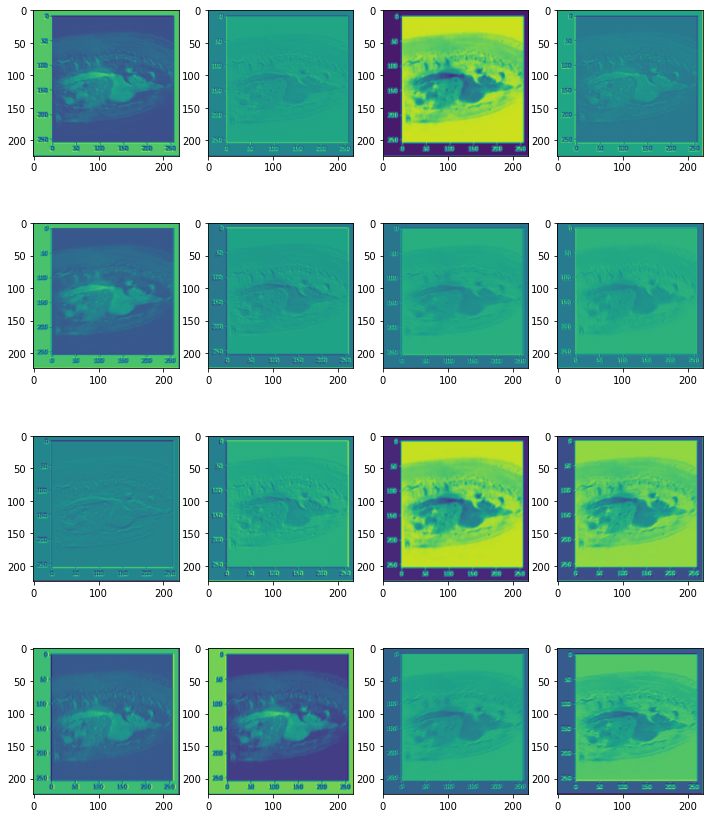

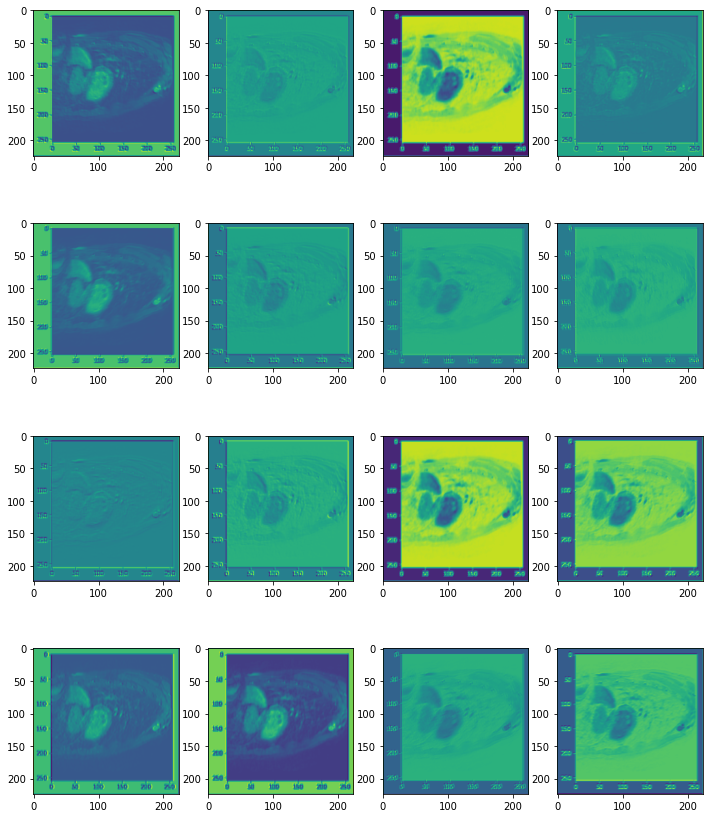

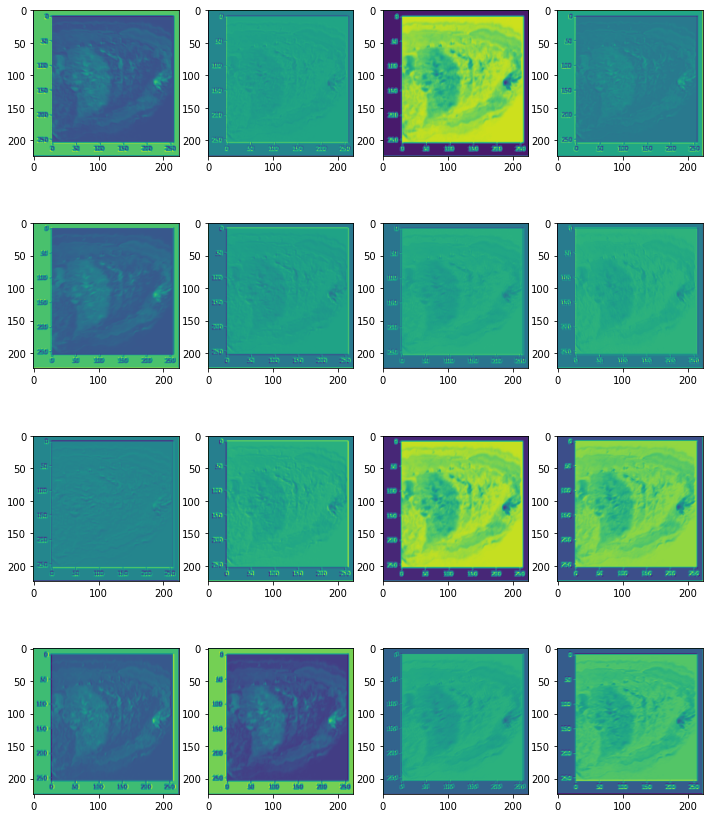

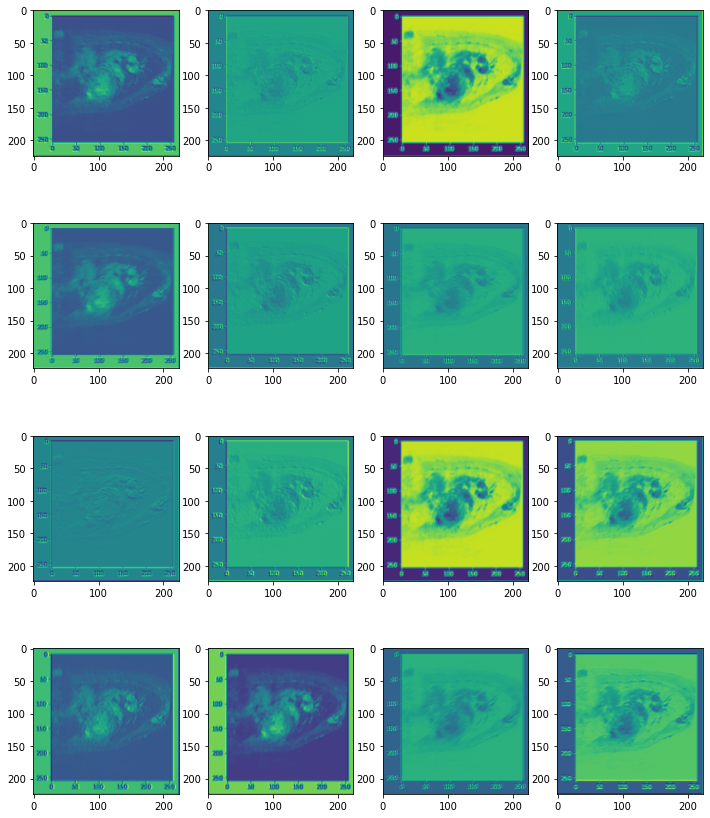

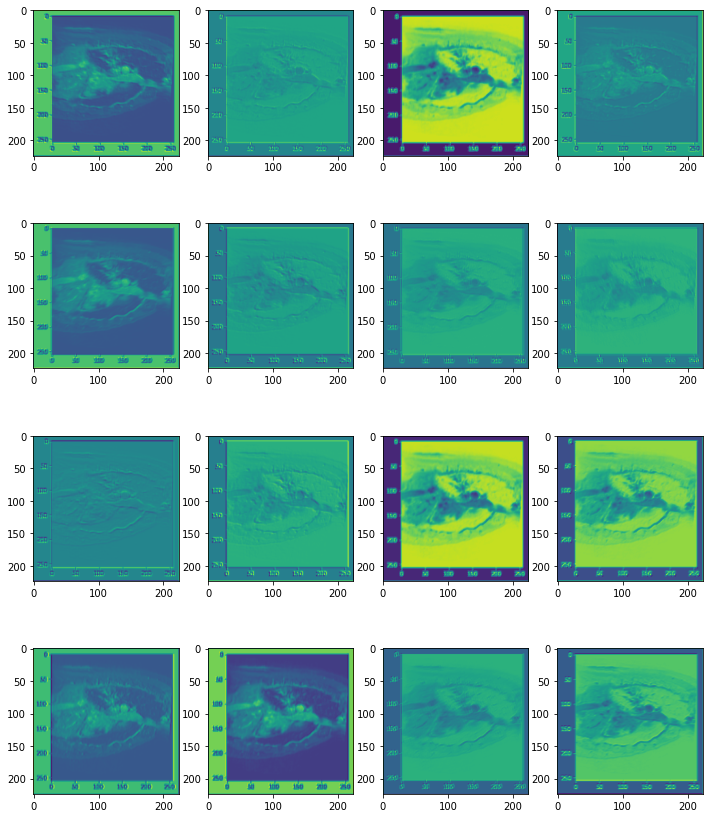

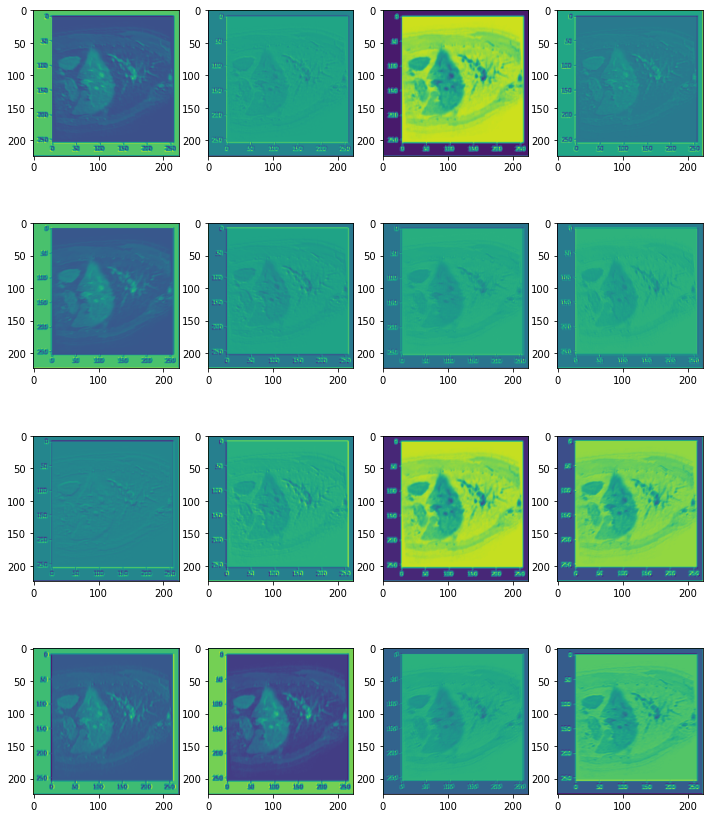

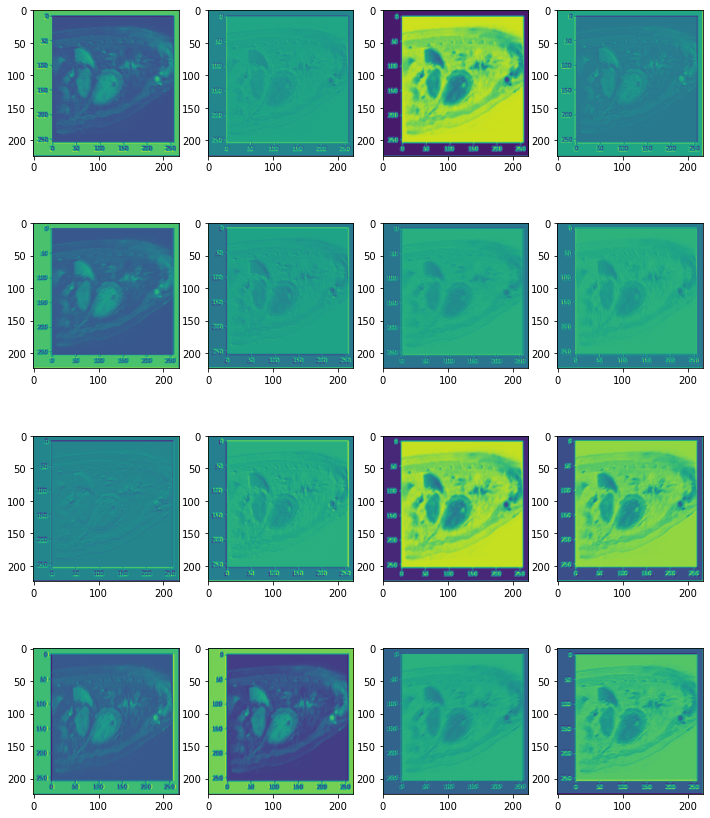

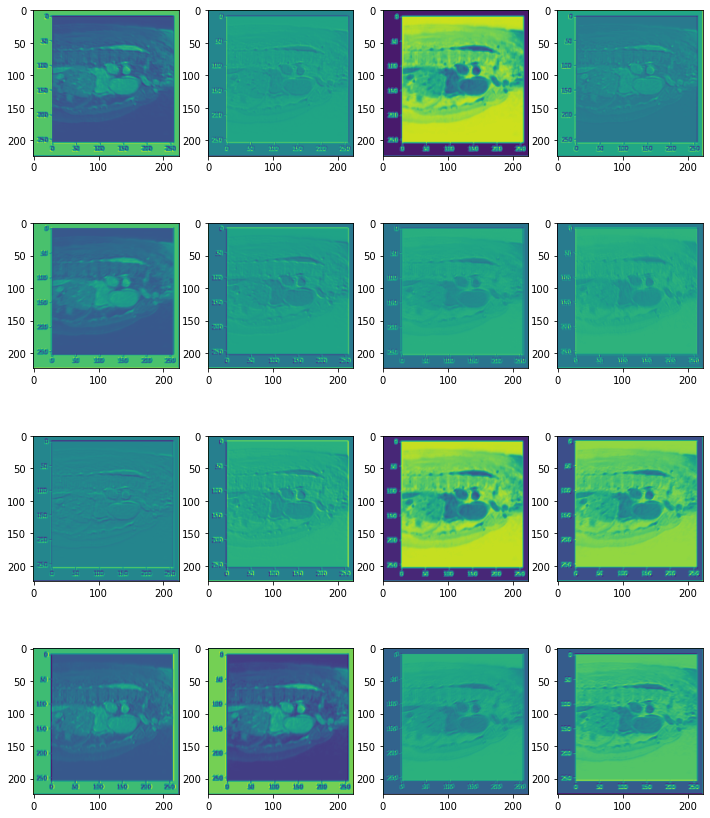

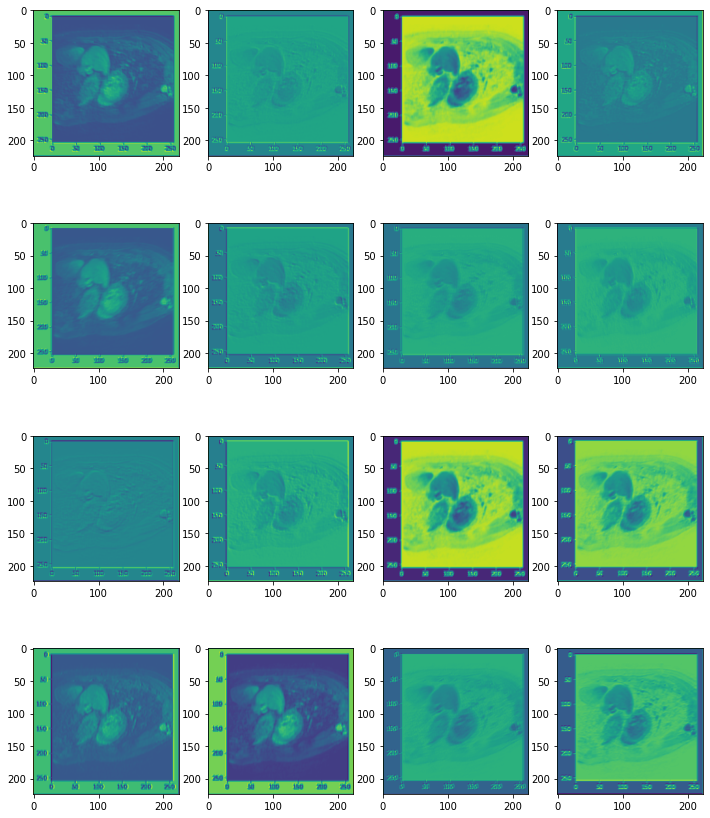

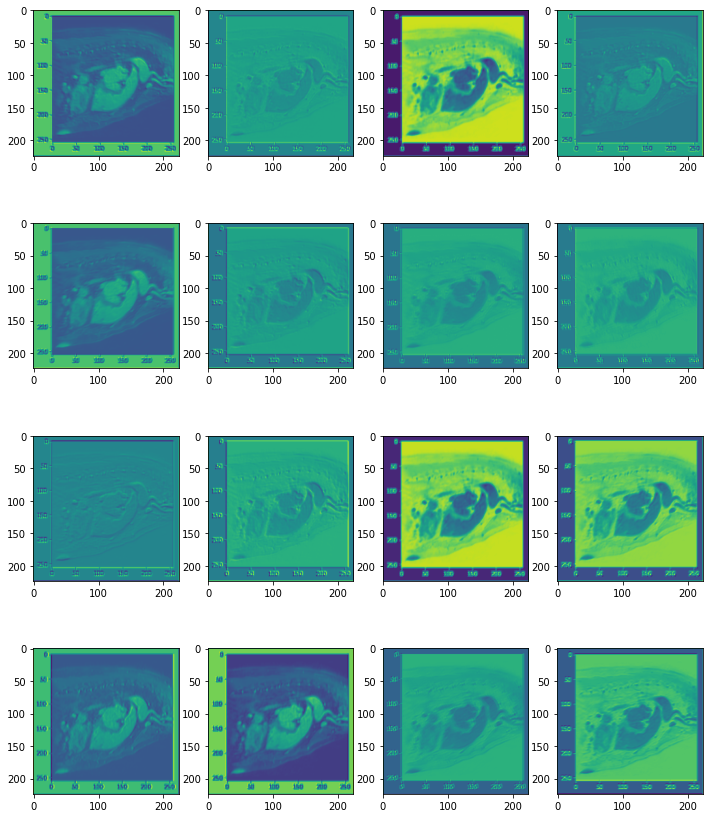

In [28]:
for i in imgs:
  output = model(i)
  k=0
  act = activation['conv1'].squeeze()
  print(act.type)


  fig,ax = plt.subplots(4,4,figsize=(12, 15))

  for i in range(act.size(0)//4):
        for j in range(act.size(0)//4):
           ax[i,j].imshow(act[k].detach().cpu().numpy())
           k+=1    
           plt.savefig('fm1.png') 
